In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
qald_9_test = pd.read_csv('../data/alpe-experiments/merged/qald-9-plus-test.tsv', sep='\t')
qald_9_train = pd.read_csv('../data/alpe-experiments/merged/qald-9-plus-train.tsv', sep='\t')
qald_10 = pd.read_csv('../data/alpe-experiments/merged/qald-10.tsv', sep='\t')

In [5]:
qald_9_test.head()

,id,prompt,generated_nl,gold_standard_nl,lang,model,prompt_type,query,tokenized_generated_nl,tokenized_gold_standard_nl,sentence_bleu,sentence_nist,rougeL,levenshtein,same,3%,correct,73%
0,99,Having a SPARQL query: SELECT DISTINCT ?o1 WHE...,What are the distinct values of the time zones...,What is the time zone of Salt Lake City?,en,gpt-3.5-turbo,ZERO_SHOT,SELECT DISTINCT ?o1 WHERE { <http://www.wikida...,"['What', 'are', 'the', 'distinct', 'values', '...","['What', 'is', 'the', 'time', 'zone', 'of', 'S...",0.1930,1.7587,0.4167,44,0.0,NaN,1.0,NaN
1,98,Having a SPARQL query: SELECT DISTINCT ?o1 WHE...,What are the names of the individuals who kill...,Who killed Caesar?,en,gpt-3.5-turbo,ZERO_SHOT,SELECT DISTINCT ?o1 WHERE { <http://www.wikida...,"['What', 'are', 'the', 'names', 'of', 'the', '...","['Who', 'killed', 'Caesar', '?']",0.1834,0.5000,0.3077,45,0.0,NaN,1.0,NaN
2,86,Having a SPARQL query: PREFIX wdt: <http://www...,What is the highest mountain in Germany based ...,What is the highest mountain in Germany?,en,gpt-3.5-turbo,ZERO_SHOT,PREFIX wdt: <http://www.wikidata.org/prop/dire...,"['What', 'is', 'the', 'highest', 'mountain', '...","['What', 'is', 'the', 'highest', 'mountain', '...",0.4137,1.6000,0.5714,39,0.0,NaN,1.0,NaN
3,84,Having a SPARQL query: SELECT DISTINCT ?o WHER...,Which head of government of the United States ...,Which American presidents were in office durin...,en,gpt-3.5-turbo,ZERO_SHOT,SELECT DISTINCT ?o WHERE { <http://www.wikidat...,"['Which', 'head', 'of', 'government', 'of', 't...","['Which', 'American', 'presidents', 'were', 'i...",0.0860,0.6919,0.2500,111,0.0,NaN,1.0,NaN
4,81,Having a SPARQL query: PREFIX wd: <http://www....,Who is the head of government of Butch Otter?,Butch Otter is the governor of which U.S. state?,en,gpt-3.5-turbo,ZERO_SHOT,PREFIX wd: <http://www.wikidata.org/entity/> P...,"['Who', 'is', 'the', 'head', 'of', 'government...","['Butch', 'Otter', 'is', 'the', 'governor', 'o...",0.2804,1.9932,0.3333,31,0.0,NaN,0.0,NaN


# Qald 9 plus Test

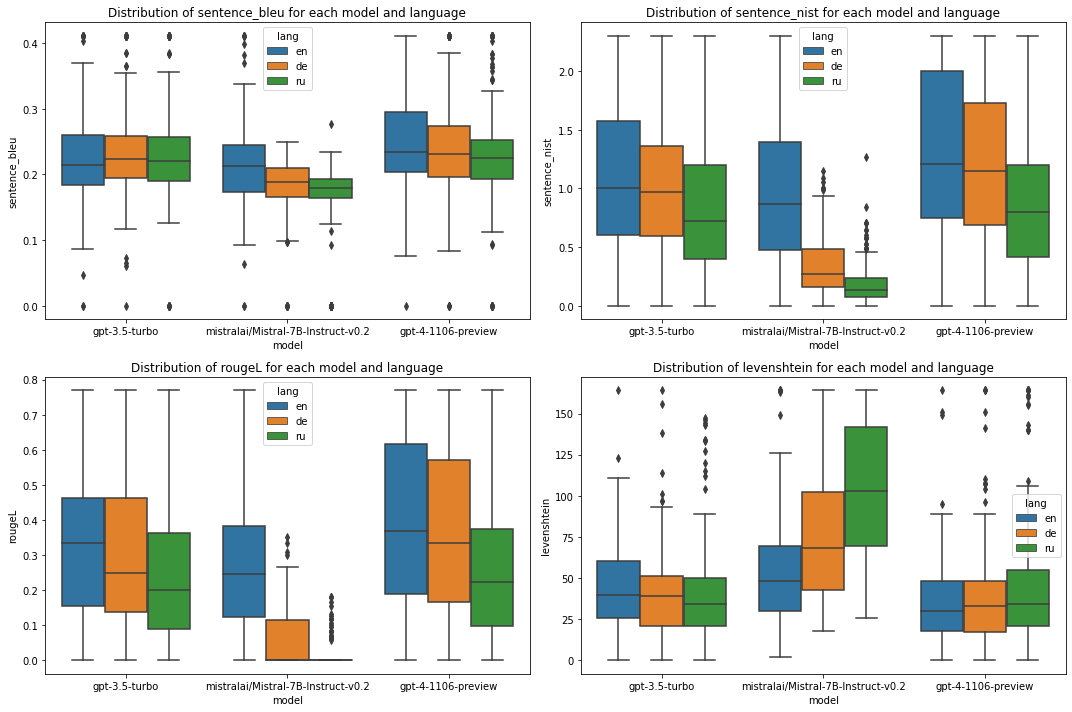

In [8]:
# List of metrics to visualize
metrics = ['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein']

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Reshape axs to 1D for easy iteration
axs = axs.ravel()

# Loop through each metric
for i, metric in enumerate(metrics):
    # Clip values by 95%
    clipped_data = qald_9_test[metric].clip(upper=qald_9_test[metric].quantile(0.95))
    
    sns.boxplot(x='model', y=clipped_data, hue='lang', data=qald_9_test, ax=axs[i])
    axs[i].set_title(f'Distribution of {metric} for each model and language')

plt.tight_layout()
plt.show()


# Qald 9 plus Train

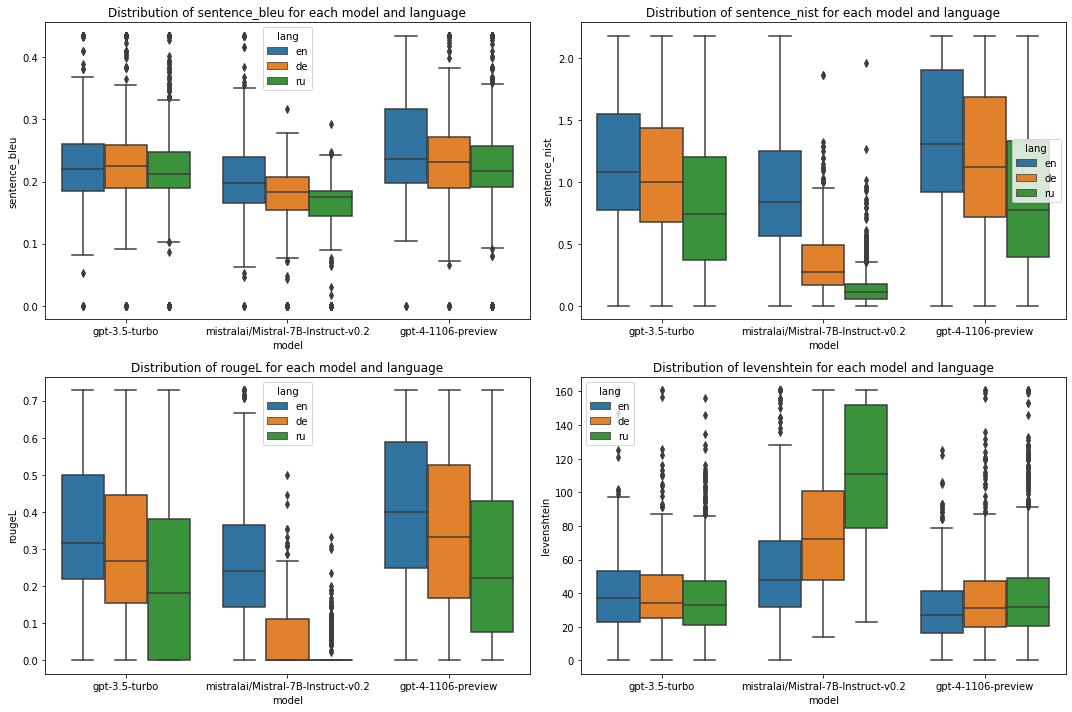

In [9]:
# List of metrics to visualize
metrics = ['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein']

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Reshape axs to 1D for easy iteration
axs = axs.ravel()

# Loop through each metric
for i, metric in enumerate(metrics):
    # Clip values by 95%
    clipped_data = qald_9_train[metric].clip(upper=qald_9_train[metric].quantile(0.95))
    
    sns.boxplot(x='model', y=clipped_data, hue='lang', data=qald_9_train, ax=axs[i])
    axs[i].set_title(f'Distribution of {metric} for each model and language')

plt.tight_layout()
plt.show()


# QALD 10

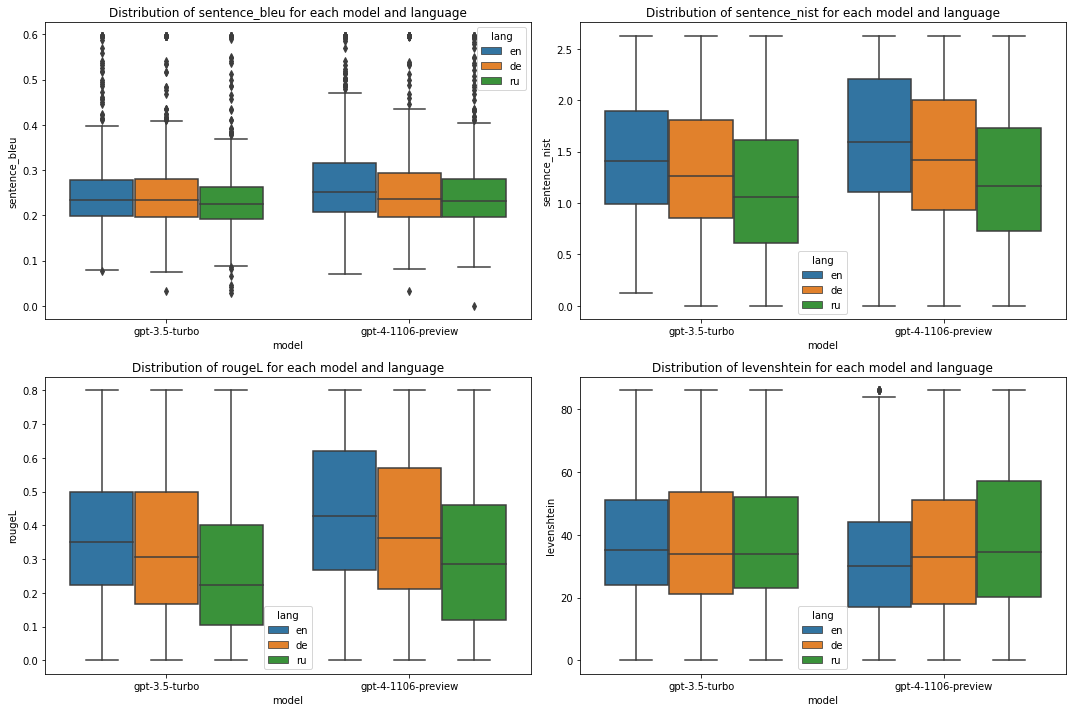

In [10]:
# List of metrics to visualize
metrics = ['sentence_bleu', 'sentence_nist', 'rougeL', 'levenshtein']

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Reshape axs to 1D for easy iteration
axs = axs.ravel()

# Loop through each metric
for i, metric in enumerate(metrics):
    # Clip values by 95%
    clipped_data = qald_10[metric].clip(upper=qald_10[metric].quantile(0.95))
    
    sns.boxplot(x='model', y=clipped_data, hue='lang', data=qald_10, ax=axs[i])
    axs[i].set_title(f'Distribution of {metric} for each model and language')

plt.tight_layout()
plt.show()
